In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sqlalchemy import create_engine
import pandas.io.sql as psql

<ipython-input-1-e4ea604be45d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
POSTGRES_ADDRESS = '' 
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'xxx' 
POSTGRES_PASSWORD = 'xxx' 
POSTGRES_DBNAME = 'xxx'
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
 .format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))


In [4]:
cnx = create_engine(postgres_str)

In [5]:
df = psql.read_sql_query('''SELECT hrly_cst, count FROM oph ORDER BY hrly_cst;''', cnx)
df.columns = ['ds', 'y']

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np, pandas as pd
X_train, X_test = train_test_split(df, random_state=1)
print(X_train.head())
print(len(X_train))
print(X_test.head())
print(len(X_test))

                      ds       y
3636 2022-04-07 04:00:00    5681
3420 2022-03-29 04:00:00    5078
1201 2021-12-26 13:00:00  102826
1964 2022-01-27 08:00:00   59967
3348 2022-03-26 04:00:00    4673
3114
                      ds      y
3467 2022-03-31 03:00:00   4391
1135 2021-12-23 19:00:00  91468
2642 2022-02-24 15:00:00  66756
2600 2022-02-22 21:00:00  40334
1176 2021-12-25 12:00:00  32696
1039


In [9]:
df_train = X_train.copy()
df_train.head()

,ds,y
3636,2022-04-07 04:00:00,5681
3420,2022-03-29 04:00:00,5078
1201,2021-12-26 13:00:00,102826
1964,2022-01-27 08:00:00,59967
3348,2022-03-26 04:00:00,4673


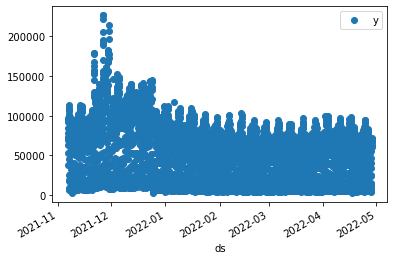

In [14]:
df.plot(x='ds', y='y', style='o')
pyplot.show()

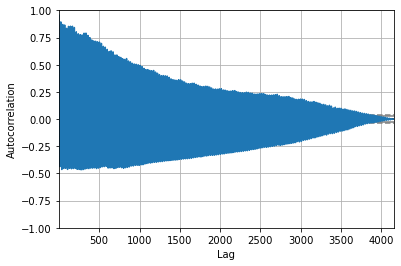

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['y'])
pyplot.show()

In [44]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['y'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/Z002FDH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4152
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -43190.012
Method:                       css-mle   S.D. of innovations           7968.140
Date:                Thu, 28 Apr 2022   AIC                          86388.024
Time:                        19:13:26   BIC                          86413.349
Sample:                             1   HQIC                         86396.984
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8278    412.289     -0.021      0.983    -816.900     799.245
ar.L1.D.y      0.7349      0.014     52.550      0.000       0.707       0.762
ma.L1.D.y     -0.1155      0.018     -6.295      0.0

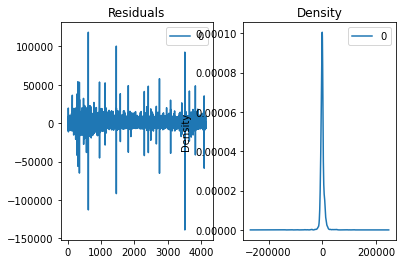

In [45]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

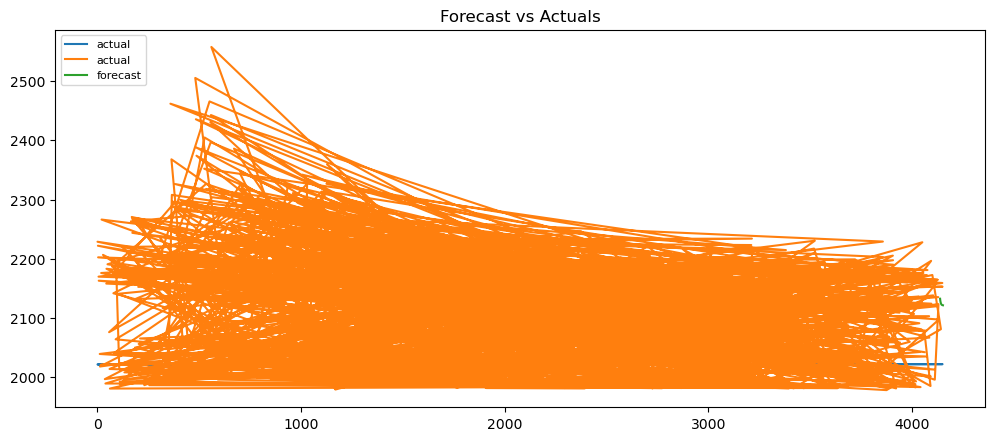

In [47]:
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=df.index[-15:])
#lower_series = pd.Series(conf[:, 0], index=df.index)
#upper_series = pd.Series(conf[:, 1], index=df.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()